In [6]:
import sys
import os
sys.path.append(os.path.abspath("../"))  # or "../../" depending on location
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [7]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from utils.load_models import set_device, get_CNN,get_CNN_small,get_resnet
from utils.evaluate_uap_fanctions import *

# ==========================
# 前処理（ToTensorのみ＋別でnormalize関数を適用）
# ==========================

transform = transforms.ToTensor()

# ==========================
# テストデータ読み込み
# ==========================
test_dataset = datasets.CIFAR10(root="../data", train=False, download=False, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)



device = set_device()
# ==========================
# UAP読み込み
# ==========================

uap_paths = {
    "CNN": "../attacks/uap/uap_delta_CNN.pt",
    "CNN_small": "../attacks/uap/uap_delta_CNN_small.pt",
    "ResNet": "../attacks/uap/uap_delta_resnet.pt"
}
uap_path = uap_paths["CNN_small"]  #任意のものに変更
delta = torch.load(uap_path, map_location=device)



In [8]:
# ==========================
# 評価実行
# ==========================
cnn = get_CNN()
cnn = cnn.to(device)
acc_clean = evaluate_uap(cnn, test_loader, delta=None,device =device)
acc_adv = evaluate_uap(cnn, test_loader, delta=delta,device=device)

print(f"Accuracy on Original:    {acc_clean * 100:.2f}%")
print(f"Accuracy on Adversarial: {acc_adv * 100:.2f}%")


Accuracy on Original:    79.94%
Accuracy on Adversarial: 65.63%


In [9]:
resnet = get_resnet()
resnet = resnet.to(device)
resnet.eval()

acc_clean = evaluate_uap(resnet,test_loader,device=device)
acc_adv = evaluate_uap(resnet, test_loader, delta,device=device)

print(f"Accuracy on Original:    {acc_clean * 100:.2f}%")
print(f"Accuracy on Adversarial: {acc_adv * 100:.2f}%")

Accuracy on Original:    88.09%
Accuracy on Adversarial: 68.44%


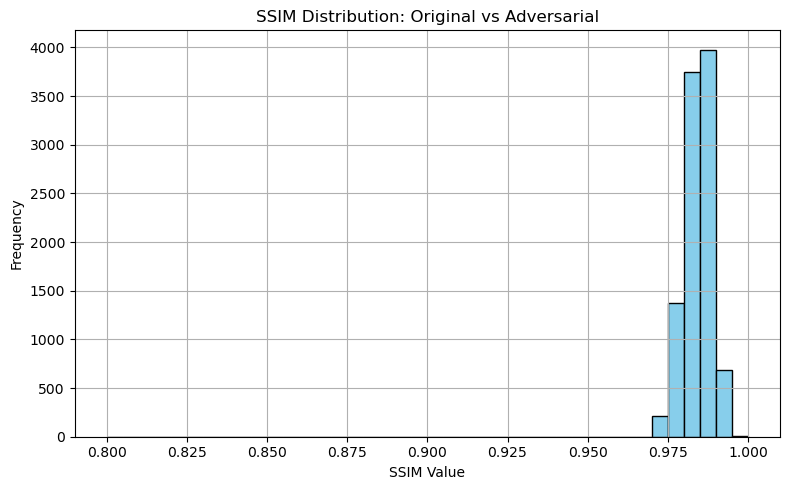

平均 SSIM: 0.9843，標準偏差: 0.0041


In [10]:
plot_ssim_distribution(dataset=test_dataset ,delta=delta,device=device)

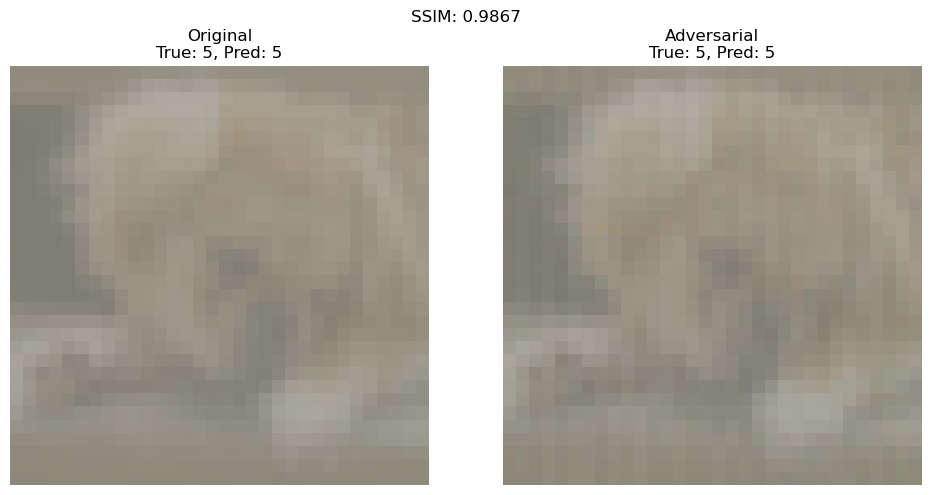

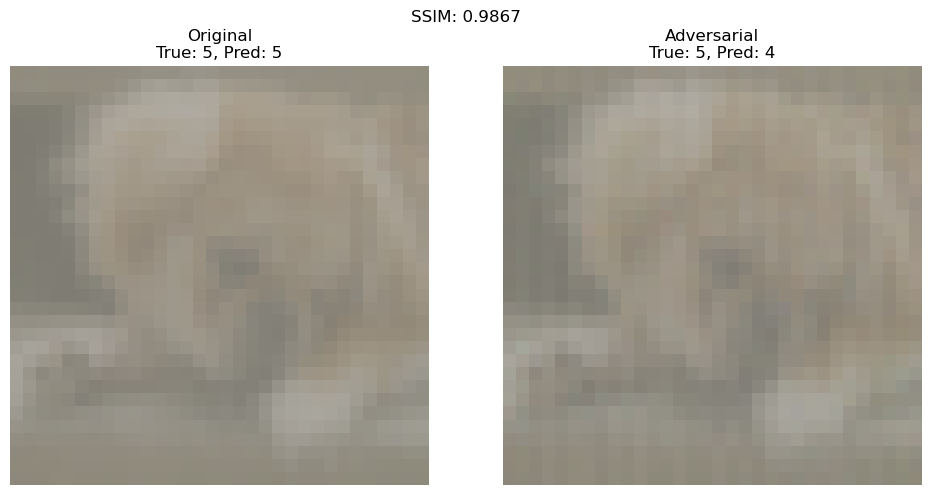

In [11]:
index = 6823
visualize_uap_effect(cnn,delta,test_dataset,index=index,device=device)
visualize_uap_effect(resnet,delta,test_dataset,index=index,device=device)